## Question 3: 
### Intent: Check you problem solving approach on machine learning Consider the dataset on Question 2. Now, A client has solicited your services to develop a machine-learning model that can forecast the approximate value of their customers' used cars. The objective is to provide accurate quotations to customers on the price to offer for the purchase of their used cars. You have been furnished with a dataset of used cars, and your task is to:

### conduct exploratory data analysis

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
test=pd.read_csv(r'C:\ODU internship\autos.csv')

In [3]:
test.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
test_corr=test.corr()

#### corr() returns the relationship between the different attributes and how each of them affect the other

<AxesSubplot:>

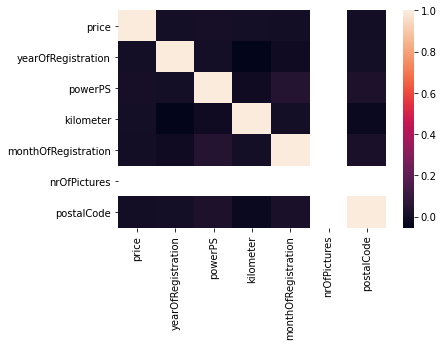

In [5]:
# a pictorial represntation of this can done by using heatmap
sns.heatmap(test_corr)

#### corr() only works for integer and float values and not for object values

### Check for missing data

In [6]:
test.isnull() #missing data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False
371524,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
371525,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
371526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


<AxesSubplot:>

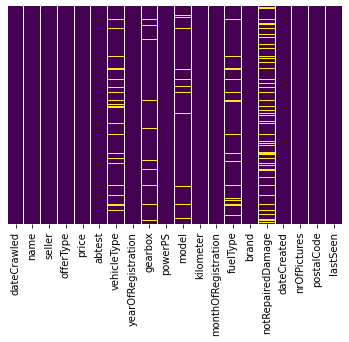

In [7]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False,cmap='viridis') 
# gives a plot of null value against then non null values allowing us to visualise the data

<AxesSubplot:>

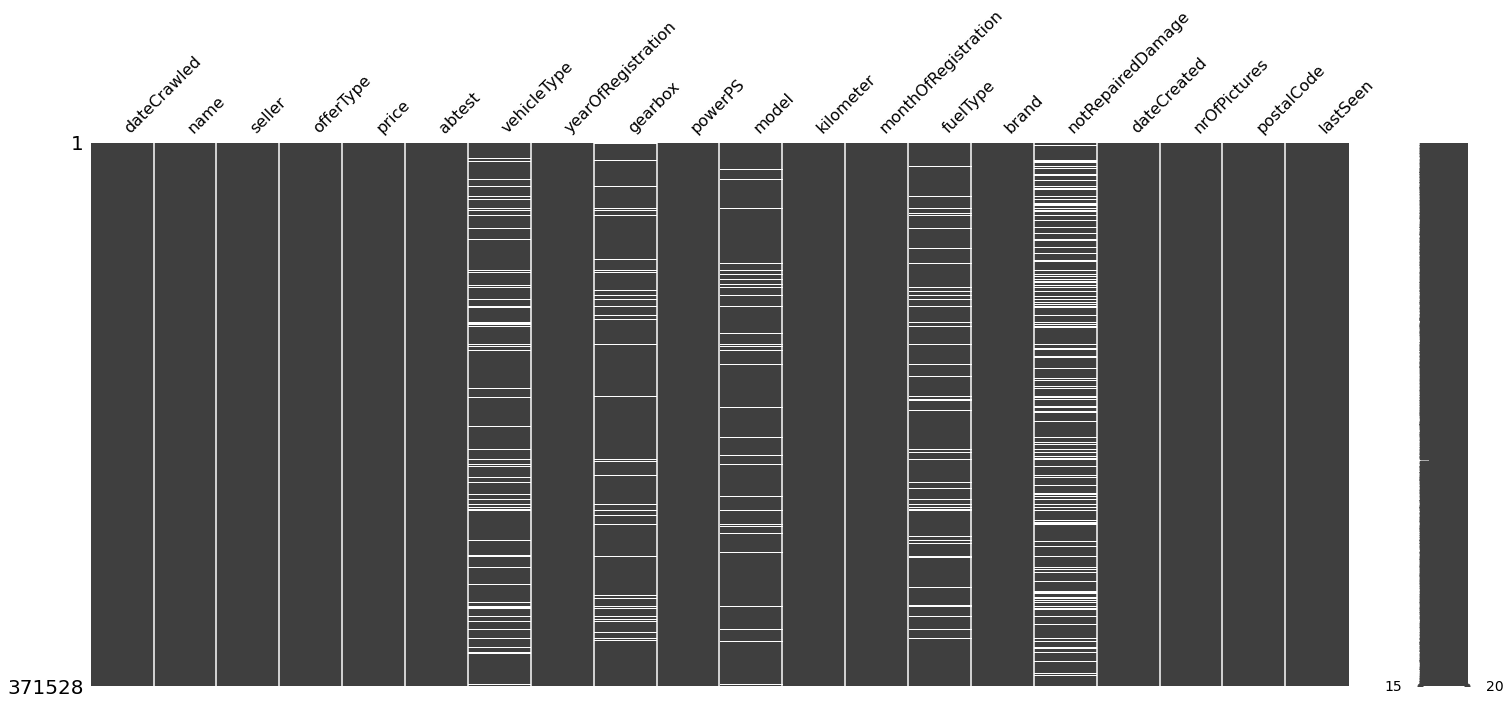

In [8]:
msno.matrix(test)

In [9]:
print(test.isnull().sum())
# count of all the null values in each of the attributes

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


In [10]:
features_with_na=[features for features in test.columns if test[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(test[feature].isnull().mean(), 4),  ' % missing values')
# getting percentage of the null value in each feature so as to make it easy to visualize

vehicleType 0.1019  % missing values
gearbox 0.0544  % missing values
model 0.0551  % missing values
fuelType 0.0899  % missing values
notRepairedDamage 0.194  % missing values


### Checking how the above null values affect the price of the vehicle using plots

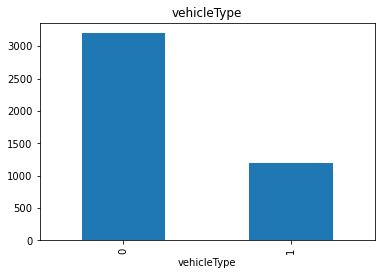

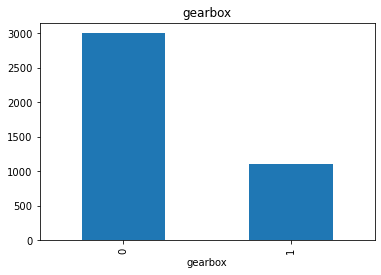

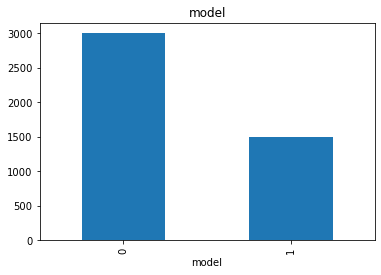

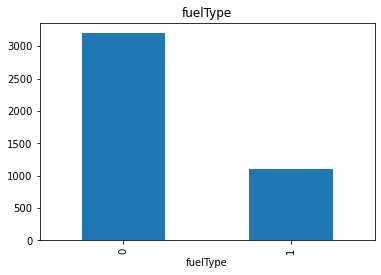

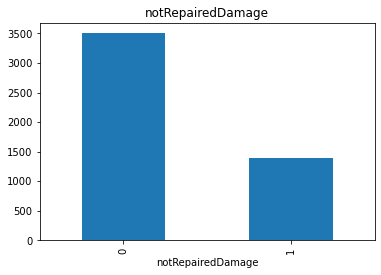

In [11]:
for feature in features_with_na:
    data=test.copy()
    
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### as we see none of the null values have any masive effect on the price of the vechile for the customer

### checking relationship between all the non object data

In [12]:
numerical_features = [feature for feature in test.columns if test[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

test[numerical_features].head()

Number of numerical variables:  7


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
0,480,1993,0,150000,0,0,70435
1,18300,2011,190,125000,5,0,66954
2,9800,2004,163,125000,8,0,90480
3,1500,2001,75,150000,6,0,91074
4,3600,2008,69,90000,7,0,60437


In [13]:
# seperating year values from the numerical_features
year_feature = [feature for feature in numerical_features if 'year' in feature]

year_feature

['yearOfRegistration']

In [14]:
for feature in year_feature:
    print(test[feature].unique())
# We see that there a lot of year values that do not make logical sense as of now these are the values that must be removed

[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1111
 1969 1971 1987 1986 1988 1967 1970 1965 1945 1925 1974 1979 1955 1978
 1972 1977 1961 1963 1964 1960 1966 1975 1937 1936 5000 1954 1958 9999
 1956 3200 1000 1933 1941 1962 8888 1500 2200 4100 1929 1951 1957 1940
 3000 2066 1949 2019 1800 1953 1935 1234 8000 5300 9000 2900 6000 5900
 5911 1400 1950 4000 1948 1952 1200 8500 1932 1255 1927 1923 1931 3700
 3800 4800 1942 7000 1911 6500 2290 2500 1930 1001 6200 9450 1944 1943
 1947 1934 1938 1688 2800 1253 1928 7500 1919 5555 7777 5600 1600 1939
 2222 1039 9996 1300 8455 1915 4500 1920 1602 7800 9229 1946 7100 8200
 3500]


Text(0, 0.5, 'median price')

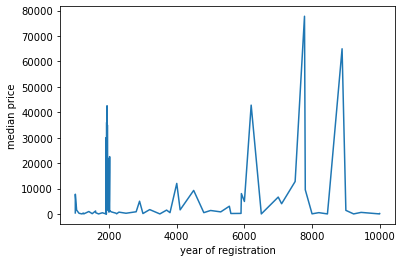

In [15]:
test.groupby('yearOfRegistration')['price'].median().plot()
plt.xlabel('year of registration')
plt.ylabel('median price')
# This is how the yearOfRegistration affects the price of the vehicle

##### now these numerical values can be differentiated as discrete and continous. There are different plots to visualize both of them using seaborn

In [16]:
discrete_feature=[feature for feature in numerical_features if len(test[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)
test[discrete_feature].head()

Discrete Variables Count: 3
['kilometer', 'monthOfRegistration', 'nrOfPictures']


,kilometer,monthOfRegistration,nrOfPictures
0,150000,0,0
1,125000,5,0
2,125000,8,0
3,150000,6,0
4,90000,7,0


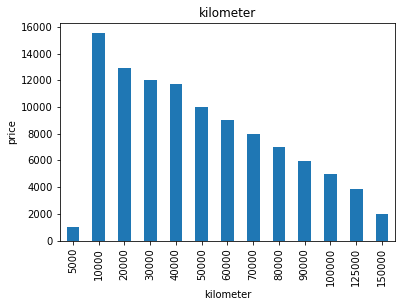

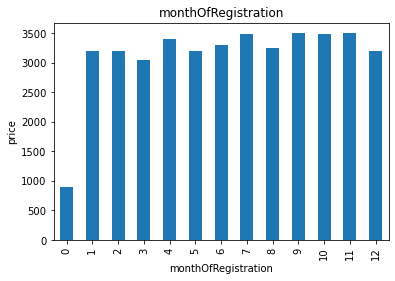

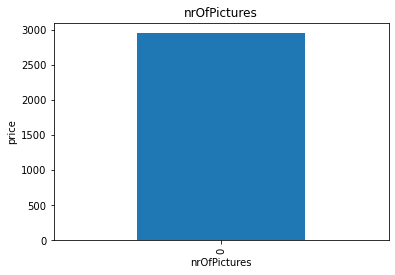

In [17]:
for feature in discrete_feature:
    data=test.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

##### as we see in case of noOfPictures we donot have any data as such so it is as good as that feature not existing 

In [18]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)
test[continuous_feature].head()

Continuous feature Count 3
['price', 'powerPS', 'postalCode']


,price,powerPS,postalCode
0,480,0,70435
1,18300,190,66954
2,9800,163,90480
3,1500,75,91074
4,3600,69,60437


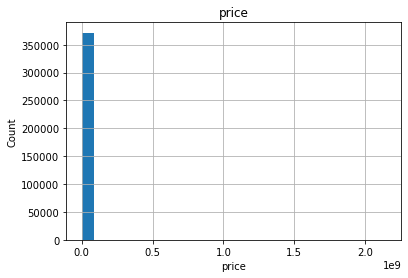

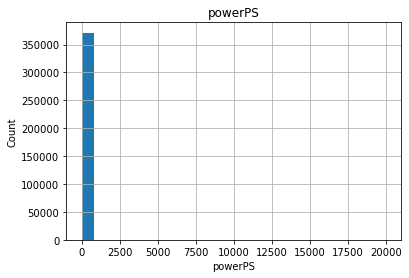

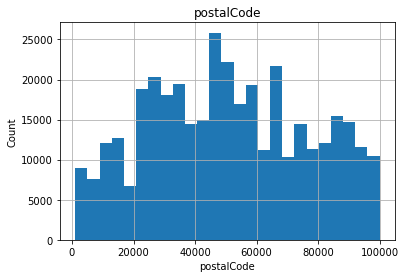

In [19]:
for feature in continuous_feature:
    data=test.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### identify crucial features that will be utilized in the model

#### Features such as yearOfRegistration, monthOFRegistration, kilometer are all extreamely essential features in order to build the models. 
#### Features such as postal code and noOfPictures are not really adding to the prediction of the price of vehicle so these features can be removed.
#### The missing values for Fuel, GearBox and Fueltype can be resolved by replacing the Nan values with the most repeated values among Fuel, GearBox and Fueltype respectively under an assumption that the majority will apply for these features.
#### features such as brand, VehicleType, abTest,Gearbox, Kilometer, PowerPS, monthOfRegistration and yearOfregistration, notRepaired are extreamly important features.
#### name, seller, offerType, postalcode, noOFPictures can all be removed as seller and offerType have same value for all the data instances, name of a vehicle, postal code does not contribute to the price in any way and as no images exist it cannot contribute to the price as well.

### potential challenges or limitations

#### as we saw in the exploratory data analysis part, there were a lot of null values with the given dataset, building a model ignoring such Nan values will result in your model having very less accuracy.
#### In yearOfRegistration column too we have seen erronour year values such as 9999 and 1000 before, these need to be resolved during feature selection and extraction process so as to increase the accuracy of our model
#### and Finally, after the data processing life cycle is complete we can train and build a Regression model using scikit learn. We can use a simple Linear Regression model to plot a line function over the dataset in order to perform the prediction and obtain results.